<a href="https://colab.research.google.com/github/Ash2809/Diabetes_Predictor/blob/main/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
dataset=pd.read_csv("/content/diabetes.csv")
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1000x1000 with 0 Axes>

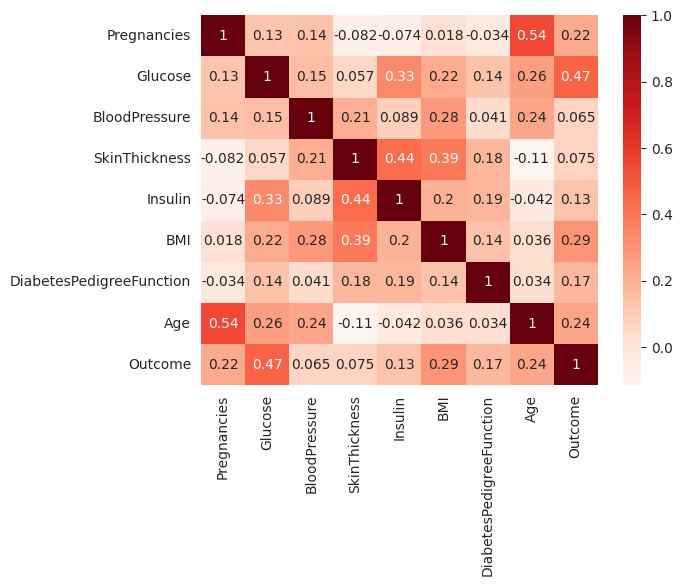

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.set_style("whitegrid")
sns.heatmap(dataset.corr(),annot=True,cmap='Reds')
plt.figure(figsize=(10,10))

In [ ]:
dataset=dataset.drop(['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'],axis=1)
dataset.head(5)

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,33.240885,0.348958
std,3.369578,31.972618,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,67.100000,81.000000,1.000000


(764, 5)

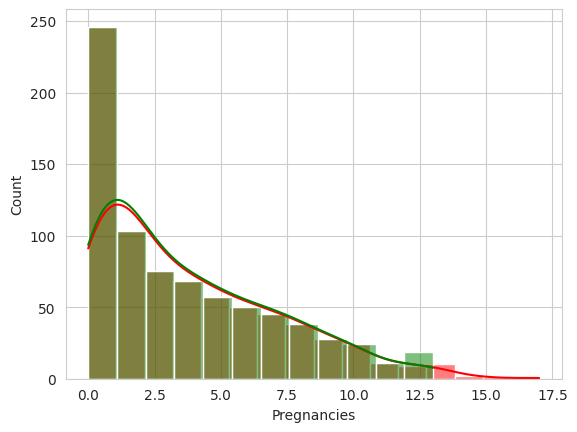

In [ ]:
sns.histplot(dataset['Pregnancies'],color='red',kde=True)
max_range=dataset['Pregnancies'].mean()+3*dataset['Pregnancies'].std()
dataset=dataset[dataset['Pregnancies']<=max_range]
sns.histplot(dataset['Pregnancies'],color='green',kde=True)
dataset.shape

(759, 5)

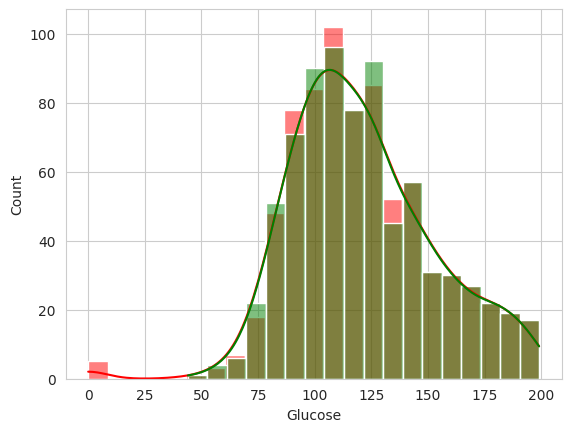

In [ ]:
sns.histplot(dataset['Glucose'],color='red',kde=True)
min_range=dataset['Glucose'].mean()-3*dataset['Glucose'].std()
max_range=dataset['Glucose'].mean()+3*dataset['Glucose'].std()
dataset=dataset[(dataset['Glucose']<=max_range) & (dataset['Glucose']>=min_range)]
sns.histplot(dataset['Glucose'],color='green',kde=True)
dataset.shape

(745, 5)

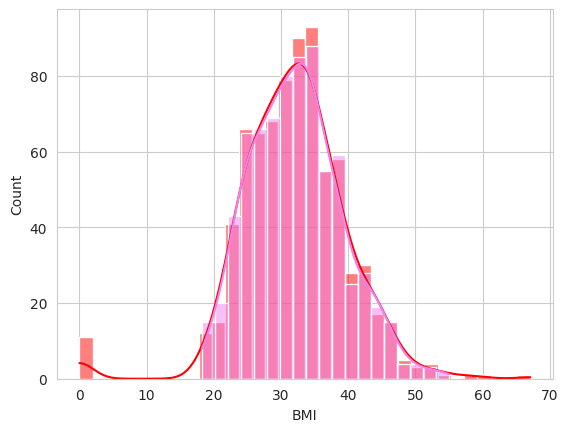

In [ ]:
sns.histplot(dataset['BMI'],color='red',kde=True)
min_range=dataset['BMI'].mean()-3*dataset['BMI'].std()
max_range=dataset['BMI'].mean()+3*dataset['BMI'].std()
dataset=dataset[(dataset['BMI']<=max_range) & (dataset['BMI']>=min_range)]
sns.histplot(dataset['BMI'],color='violet',kde=True)
dataset.shape

In [ ]:
# sns.histplot(dataset['Age'],color='red',kde=True)
# min_range=dataset['Age'].mean()-3*dataset['Age'].std()
# max_range=dataset['Age'].mean()+3*dataset['Age'].std()
# dataset=dataset[(dataset['Age']<=max_range) & (dataset['Age']>=min_range)]
# sns.histplot(dataset['Age'],color='blue',kde=True)
# dataset.shape

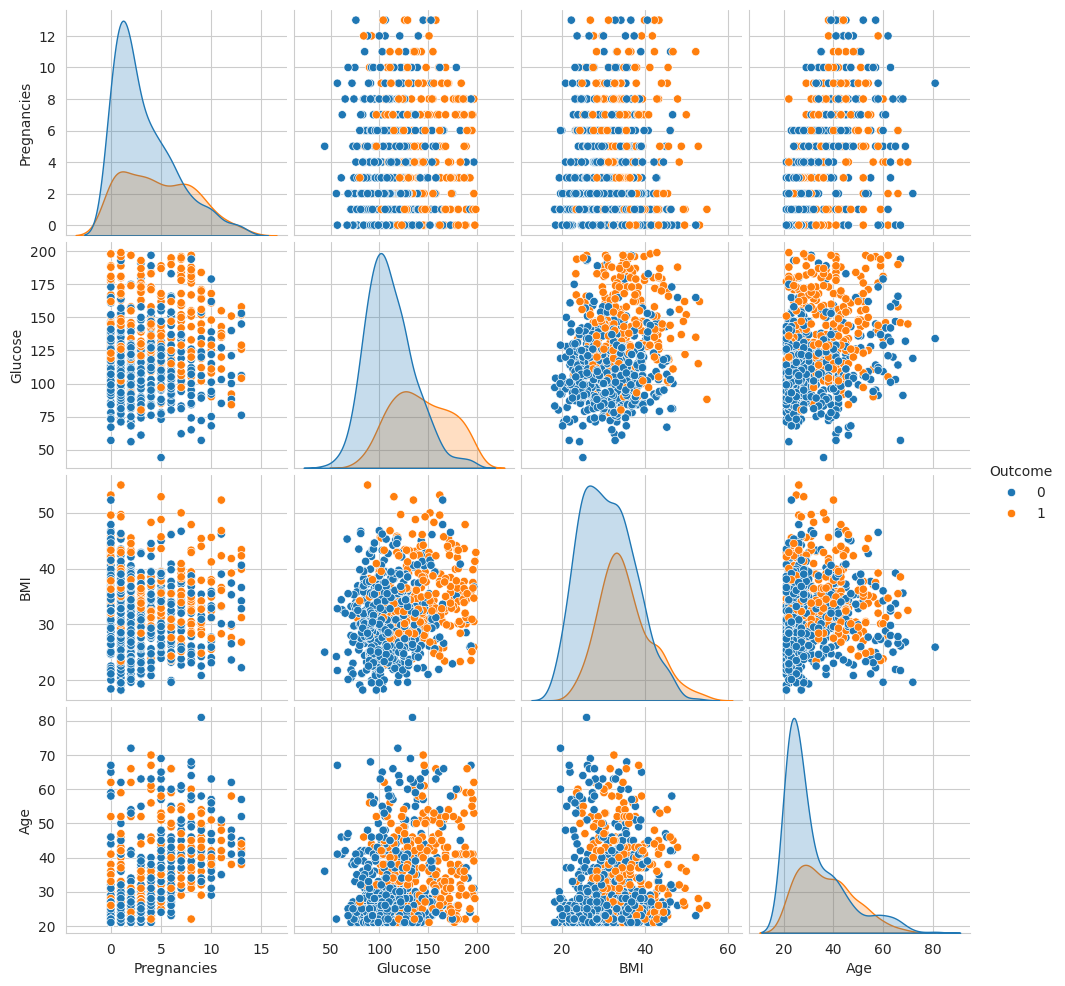

In [ ]:
sns.pairplot(dataset,hue='Outcome')

In [ ]:
x = dataset.iloc[:, :-1]
y=dataset['Outcome']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape,x_test.shape)

(596, 4) (149, 4)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)*100

79.86577181208054

TUNING


In [ ]:
dic={"n_neighbors":[i for i in range(1,50)],"weights":["uniform", "distance"]}

In [ ]:
cv=GridSearchCV(KNeighborsClassifier(),dic)
cv.fit(x_train,y_train)
cv.best_params_

{'n_neighbors': 14, 'weights': 'uniform'}

In [ ]:
for i in range(1,50):
  knn1=KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 100.0 72.48322147651007
2 82.29342327150084 74.49664429530202
3 82.79932546374368 76.51006711409396
4 79.25801011804384 77.18120805369128
5 81.45025295109612 77.85234899328859
6 79.59527824620574 79.19463087248322
7 79.93254637436762 79.19463087248322
8 78.58347386172007 79.19463087248322
9 77.74030354131534 77.18120805369128
10 77.06576728499157 80.53691275167785
11 77.40303541315345 79.19463087248322
12 78.58347386172007 81.20805369127517
13 78.07757166947724 81.20805369127517
14 77.90893760539629 81.87919463087249
15 78.24620573355818 80.53691275167785
16 77.90893760539629 80.53691275167785
17 78.41483979763912 80.53691275167785
18 77.57166947723441 81.87919463087249
19 77.57166947723441 82.5503355704698
20 77.40303541315345 81.87919463087249
21 77.40303541315345 82.5503355704698
22 76.22259696458684 79.86577181208054
23 76.72849915682967 83.22147651006712
24 76.22259696458684 79.86577181208054
25 77.57166947723441 81.20805369127517
26 77.40303541315345 81.20805369127517
27 77.571

In [ ]:
knn.predict([[1,140,26,50]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

71.69811320754717

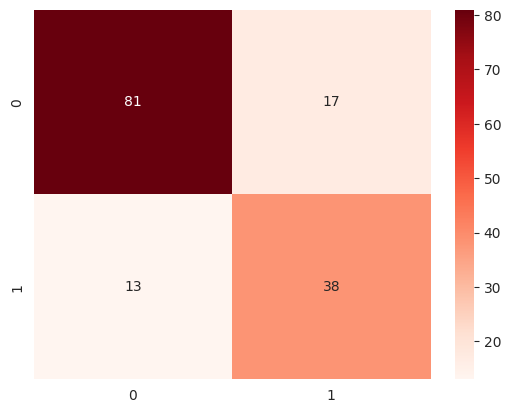

In [ ]:
cf=confusion_matrix(y_test,knn.predict(x_test))
sns.heatmap(cf,annot=True,cmap='Reds')
f1_score(y_test,knn.predict(x_test))*100

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=2)
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)*100

75.83892617449665

In [ ]:
for i in range(1,50):
  dtc1=DecisionTreeClassifier(criterion="entropy",max_depth=i)
  dtc1.fit(x_train,y_train)
  print(i,dtc1.score(x_train,y_train)*100,dtc1.score(x_test,y_test)*100)

1 73.47972972972973 74.49664429530202
2 76.52027027027027 75.83892617449665
3 76.52027027027027 75.83892617449665
4 79.3918918918919 74.49664429530202
5 80.23648648648648 74.49664429530202
6 83.78378378378379 71.81208053691275
7 85.6418918918919 73.15436241610739
8 88.17567567567568 75.16778523489933
9 90.03378378378379 71.81208053691275
10 91.8918918918919 70.46979865771812
11 93.41216216216216 70.46979865771812
12 95.6081081081081 73.15436241610739
13 96.95945945945947 72.48322147651007
14 98.1418918918919 73.8255033557047
15 99.1554054054054 74.49664429530202
16 99.83108108108108 75.16778523489933
17 100.0 74.49664429530202
18 100.0 71.81208053691275
19 100.0 73.15436241610739
20 100.0 72.48322147651007
21 100.0 71.81208053691275
22 100.0 71.14093959731544
23 100.0 73.15436241610739
24 100.0 71.14093959731544
25 100.0 74.49664429530202
26 100.0 71.81208053691275
27 100.0 72.48322147651007
28 100.0 72.48322147651007
29 100.0 71.14093959731544
30 100.0 73.8255033557047
31 100.0 74.496

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_test,y_test)*100)
print(gnb.score(x_train,y_train)*100)


77.18120805369128
75.21079258010118


In [ ]:
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
print(sv.score(x_test,y_test)*100)
print(sv.score(x_train,y_train)*100)

81.20805369127517
76.39123102866779


# ***USING ANN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import ReLU
from keras.callbacks import EarlyStopping

In [ ]:
sc=StandardScaler()
x2=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x2

,Pregnancies,Glucose,BMI,Age
0,0.669705,0.860097,0.192111,1.425969
1,-0.854211,-1.203108,-0.853562,-0.195804
2,1.279271,2.006322,-1.346521,-0.110448
3,-0.854211,-1.072111,-0.629489,-1.049370
4,-1.158995,0.499855,1.611238,-0.025091
...,...,...,...,...
740,1.888838,-0.679119,0.087544,2.535604
741,-0.549428,0.008616,0.670133,-0.537230
742,0.364922,-0.024133,-0.913314,-0.281161
743,-0.854211,0.139613,-0.330725,1.169900


In [ ]:
y2=y
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=42,test_size=0.2)

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(units=4,activation="relu"))

In [ ]:
ann.add(Dense(units=20,activation="relu"))
ann.add(Dropout(0.33))

In [ ]:
ann.add(Dense(units=11,activation="relu"))
ann.add(Dropout(0.33))

In [ ]:
ann.add(Dense(units=9,activation="relu"))
ann.add(Dropout(0.33))

In [ ]:
ann.add(Dense(units=5,activation="relu"))
ann.add(Dropout(0.33))

In [ ]:
ann.add(Dense(units=3,activation="relu"))
ann.add(Dropout(0.33))

In [ ]:
ann.add(Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="Adam",metrics=["accuracy"],loss="binary_crossentropy")

In [ ]:
model=ann.fit(x2_train,y2_train,batch_size=30,epochs=100,validation_split=0.33,callbacks=EarlyStopping())

Epoch 1/100
14/14 [==============================] - 0s 25ms/step - loss: 0.6717 - accuracy: 0.6040 - val_loss: 0.6416 - val_accuracy: 0.6904
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 0.6737 - accuracy: 0.6040 - val_loss: 0.6420 - val_accuracy: 0.6904


In [ ]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

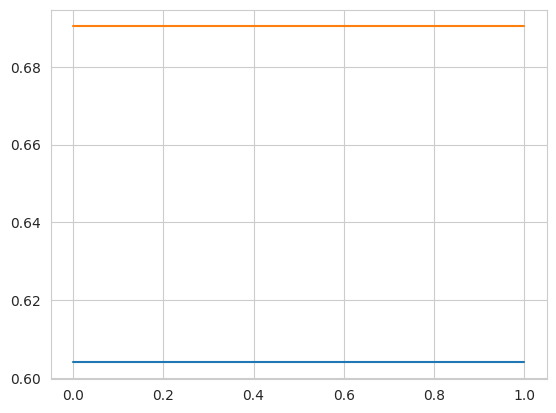

In [ ]:
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])